In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
import seaborn as sns
import japanize_matplotlib

In [68]:
d = pd.read_csv('C:/Users/tanak/OneDrive/ドキュメント/pokemon_for_stats.csv').iloc[:,1:]
gen = ["第1世代"]*151+["第2世代"]*100+["第3世代"]*135+["第4世代"]*107+["第5世代"]*156+["第6世代"]*72+["第7世代"]*88+["第8世代"]*89
d['世代'] = gen

num_cols = ['重さ','高さ','HP','攻撃','防御','特攻','特防','素早さ','合計']
d

,No.,ポケモン,タイプ1,タイプ2,重さ,高さ,HP,攻撃,防御,特攻,特防,素早さ,合計,世代
0,1,フシギダネ,くさ,どく,6.9,0.7,45,49,49,65,65,45,318,第1世代
1,2,フシギソウ,くさ,どく,13.0,1.0,60,62,63,80,80,60,405,第1世代
2,3,フシギバナ,くさ,どく,100.0,2.0,80,82,83,100,100,80,525,第1世代
3,4,ヒトカゲ,ほのお,NaN,8.5,0.6,39,52,43,60,50,65,309,第1世代
4,5,リザード,ほのお,NaN,19.0,1.1,58,64,58,80,65,80,405,第1世代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,レジエレキ,でんき,NaN,145.0,1.2,80,100,50,100,50,200,580,第8世代
894,895,レジドラゴ,ドラゴン,NaN,200.0,2.1,200,100,50,100,50,80,580,第8世代
895,896,ブリザポス,こおり,NaN,800.0,2.2,100,145,130,65,110,30,580,第8世代
896,897,レイスポス,ゴースト,NaN,44.5,2.0,100,65,60,145,80,130,580,第8世代


### 母集団と標本
我々がこれから知りたいと思う集団全体を母集団と呼ぶ。
母集団について完全に知ることは困難であり、そのようなときは、
1. 母集団からその一部を選び出し
2. それを分析
3. 母集団について推測をする

ということが行われる。
これを統計的推測と呼ぶ。

母集団から分析のために選び出された要素、またはその属性値を標本、選び出すことを標本抽出(または単に抽出)と呼ぶ。
標本の分析結果はどのような標本を抽出するかに依存する。

In [83]:
print('母集団の平均: ', d['高さ'].mean())

print('標本の平均: ')
for _ in range(5):
    idx = np.random.choice(d.index, 10)
    print(' 標本: ', list(idx))
    print(' 高さ: ',list(d.loc[d.index.isin(idx), '高さ']))
    print(' 標本平均: ', d.loc[d.index.isin(idx), '高さ'].mean())

母集団の平均:  1.1859688195991092
標本の平均: 
 標本:  [524, 424, 778, 124, 458, 522, 576, 714, 601, 416]
 高さ:  [1.1, 0.4, 0.4, 1.0, 1.6, 0.9, 0.3, 0.2, 1.5, 0.9]
 標本平均:  0.8300000000000001
 標本:  [701, 359, 318, 705, 517, 218, 867, 392, 526, 171]
 高さ:  [0.3, 0.8, 1.8, 0.6, 0.4, 1.1, 0.4, 0.2, 2.0, 0.2]
 標本平均:  0.78
 標本:  [806, 521, 174, 640, 346, 221, 325, 277, 514, 702]
 高さ:  [0.3, 0.6, 0.6, 0.9, 0.7, 0.6, 0.8, 1.5, 0.3, 1.5]
 標本平均:  0.78
 標本:  [29, 351, 353, 557, 471, 704, 659, 826, 445, 771]
 高さ:  [0.8, 1.0, 1.1, 0.6, 2.0, 1.4, 1.0, 0.8, 1.9, 0.6]
 標本平均:  1.1199999999999999
 標本:  [736, 483, 758, 131, 514, 113, 548, 216, 302, 109]
 高さ:  [1.2, 1.0, 0.3, 1.8, 0.6, 4.2, 0.6, 1.1, 0.5, 0.5]
 標本平均:  1.1800000000000002


標本の選び方で平均値の計算結果が変わることが確認できた。

#### 母集団と母集団分布
母集団の持つ分布を母集団分布と呼ぶ。
この母集団からの標本を$X_i$と表すと、$X_i$はこの母集団に従う確率変数であると考えられる。
つまり、標本$X_1,\cdots,X_n$は、同一の母集団分布$f(x)$に従う$n$個の独立な確率変数であるといえる。
また、$n$は標本の大きさ(sample size)という。

#### 母集団分布の母数
標本の値は母集団分布に従ってばらついているが、母集団についての事前の仮定によって2つの場合がある。
第1は、母集団分布がある知られた確率分布であることが、理論的・経験的に分かっている場合である。
事前に母集団分布が××分布という形で与えられており、いくつかの定数さえわかれば、母集団分布についてすべて知ることができる場合を、パラメトリックと呼ぶ。求めるべきパラメータを統計的推測では母数と呼ぶ。
第2は、母集団分布の具体的な形が、事前に知られていない場合である。このような場合を、ノンパラメトリックと呼ぶ。

#### 標本の抽出
母集団に含まれる要素の数(母集団の大きさ)を$N$、標本として取り出す要素の数(標本の大きさ)を$n$とする。
標本の抽出方法は、抽出した要素を母集団に戻し再び抽出の対象とする復元抽出と抽出された標本を母集団に戻さない戻さない非復元抽出に分けられる。

単純ランダムサンプリングとは、母集団の各要素が標本に含まれる確率を等しく$n/N$とするものである。

In [70]:
print('初代御三家')
初代御三家 = list(d.loc[:8, 'ポケモン'])
print(初代御三家)

print('\n復元抽出')
for i in range(5):
    print('{}回目'.format(i), np.random.choice(初代御三家, 5))

print('\n非復元抽出')
for i in range(5):
    print('{}回目'.format(i), np.random.choice(初代御三家, 5, replace=False))

    
idx = np.arange(len(初代御三家))
print('\n非復元抽出')
for epoch in range(3):
    np.random.shuffle(初代御三家)
    print('{}回目'.format(epoch))
    for i in range(3):
        print('　{}組目: {}'.format(i, 初代御三家[i*3:i*3+3]))

初代御三家
['フシギダネ', 'フシギソウ', 'フシギバナ', 'ヒトカゲ', 'リザード', 'リザードン', 'ゼニガメ', 'カメール', 'カメックス']

復元抽出
0回目 ['フシギダネ' 'リザードン' 'リザード' 'リザード' 'フシギダネ']
1回目 ['フシギダネ' 'フシギソウ' 'リザード' 'ヒトカゲ' 'ゼニガメ']
2回目 ['フシギダネ' 'リザードン' 'リザードン' 'リザードン' 'カメックス']
3回目 ['フシギソウ' 'フシギダネ' 'フシギダネ' 'ゼニガメ' 'ヒトカゲ']
4回目 ['ヒトカゲ' 'カメール' 'フシギバナ' 'フシギダネ' 'カメックス']

非復元抽出
0回目 ['ゼニガメ' 'カメックス' 'ヒトカゲ' 'リザード' 'フシギバナ']
1回目 ['ゼニガメ' 'リザード' 'フシギソウ' 'フシギバナ' 'フシギダネ']
2回目 ['カメール' 'カメックス' 'フシギソウ' 'ゼニガメ' 'リザードン']
3回目 ['リザード' 'カメール' 'カメックス' 'ゼニガメ' 'フシギダネ']
4回目 ['ゼニガメ' 'ヒトカゲ' 'カメックス' 'フシギソウ' 'フシギダネ']

非復元抽出
0回目
　0組目: ['ヒトカゲ', 'ゼニガメ', 'カメックス']
　1組目: ['カメール', 'フシギダネ', 'リザードン']
　2組目: ['リザード', 'フシギバナ', 'フシギソウ']
1回目
　0組目: ['カメール', 'リザード', 'リザードン']
　1組目: ['フシギダネ', 'カメックス', 'ヒトカゲ']
　2組目: ['フシギソウ', 'フシギバナ', 'ゼニガメ']
2回目
　0組目: ['カメックス', 'フシギバナ', 'ヒトカゲ']
　1組目: ['カメール', 'フシギダネ', 'リザード']
　2組目: ['リザードン', 'フシギソウ', 'ゼニガメ']


### 母数と統計量
#### 統計量
母集団分布$f(x)$を特定する代表的な母数は、平均
$$
\mu = \int_{-\inf}^{\inf}xf(x)dx\ あるいは\ \mu=\sum_x xf(x)
$$
であり、これを母平均という。同じように母分散$\sigma^2$も定まる。

全体を調べることは難しいので、大きさ$n$の標本$X_1,\cdots,X_n$をとり、標本平均$\bar{X}=(X_1+\cdots+X_n)/n$を用いる。
1. $E(\bar{X})=\mu$
2. 大数の法則から、$n$が大きくなるに従い$\bar{X}→\mu$
が成り立つから、標本平均が母平均への手掛かりとなることが分かる。

ここで、標本平均のように標本を要約し、母集団の母数の推測に使われるものを統計量と呼ぶ。
統計量は標本の関数で、一般に$t(X_1,\cdots,X_n)$と表せる。$t(X_1,\cdots,X_n)$の確率分布を標本分布と呼ぶ。

#### 標本平均と標本分散
標本$X_1,\cdots,X_n$から計算された平均、分散を標本平均、標本分散と呼ぶ。
標本$X_1,\cdots,X_n$は母集団分布に従う確率変数であるが、標本平均$\bar{X}$は、
$$
\bar{X}=\frac{X_1+\cdots+X_n}{n}
$$
で与えられる。期待値は、
$$
E(\bar{X})=E((X_1+\cdots+X_n)/n)=n\mu/n=\mu
$$
となり、母平均$\mu$と一致する。
分散は、
$$
V(\bar{X})=V\bigl(\frac{1}{n}(X_1+\cdots+X_n) \bigr)=\frac{1}{n^2}(X_1+\cdots+X_n)\\
=n\sigma^2/n^2=\sigma^2/n
$$
となり、$n→\infty$のとき$\bar{X}$の分散は0に近づき、$\bar{X}→\mu$のように収束していくことがわかる。

標本分散は
$$
s^2=\frac{1}{n-1}\{(X_1-\bar{X})^2+(X_2-\bar{X})^2+\cdots+(X_n-\bar{X})^2 \}
$$

で定義される。期待値は
$$
E(s^2)=\sigma^2
$$
と母分散に一致し、母分散を不偏(過大・過少に評価せず)に推定する。
したがって、$s^2$を母分散$\sigma^2$の不偏推定量あるいは不偏分散という。
$$
S^2=\frac{1}{n}\{(X_1-\bar{X})^2+(X_2-\bar{X})^2+\cdots+(X_n-\bar{X})^2 \}
$$
も標本分散であるが、不変ではない。
$$
E(S^2)=\frac{n-1}{n}\sigma^2
$$
となる。

In [82]:
print('初代御三家')
初代御三家 = d.loc[:8, ['ポケモン','高さ']]
ポケモンlist = 初代御三家['ポケモン'].unique()
print('  母平均: ', 初代御三家['高さ'].mean())
print('  母分散: ', 初代御三家['高さ'].var(ddof=0))

idx = np.arange(len(初代御三家))
print('\n非復元抽出')
for epoch in range(3):
    np.random.shuffle(ポケモンlist)
    print('{}回目'.format(epoch))
    m = []
    v1 = []
    v2 = []
    for i in range(3):
        tmp = 初代御三家[初代御三家['ポケモン'].apply(lambda x: x in ポケモンlist[i*3:i*3+3])]
        print('\n　{}組目: {}'.format(i, ポケモンlist[i*3:i*3+3]))
        m.append(tmp['高さ'].mean())
        v1.append(tmp['高さ'].var(ddof=0))
        v2.append(tmp['高さ'].var(ddof=1))
        
        print('    標本平均: ', m[-1])
        print('    標本分散: ', v1[-1])
        print('    標本(不偏)分散: ', v2[-1])
    print('\n   標本平均の平均: ', np.mean(m))
    print('   標本分散の平均: ', np.mean(v1))
    print('   標本(不偏)分散の平均: ', np.mean(v2))

初代御三家
  母平均:  1.1333333333333333
  母分散:  0.24444444444444446

非復元抽出
0回目

　0組目: ['カメール' 'フシギダネ' 'ヒトカゲ']
    標本平均:  0.7666666666666666
    標本分散:  0.02888888888888889
    標本(不偏)分散:  0.043333333333333335

　1組目: ['フシギバナ' 'リザードン' 'ゼニガメ']
    標本平均:  1.4000000000000001
    標本分散:  0.42
    標本(不偏)分散:  0.63

　2組目: ['リザード' 'フシギソウ' 'カメックス']
    標本平均:  1.2333333333333334
    標本分散:  0.0688888888888889
    標本(不偏)分散:  0.10333333333333336

   標本平均の平均:  1.1333333333333335
   標本分散の平均:  0.1725925925925926
   標本(不偏)分散の平均:  0.2588888888888889
1回目

　0組目: ['フシギバナ' 'フシギダネ' 'ゼニガメ']
    標本平均:  1.0666666666666667
    標本分散:  0.44222222222222224
    標本(不偏)分散:  0.6633333333333333

　1組目: ['リザードン' 'カメックス' 'カメール']
    標本平均:  1.4333333333333336
    標本分散:  0.09555555555555556
    標本(不偏)分散:  0.14333333333333334

　2組目: ['フシギソウ' 'リザード' 'ヒトカゲ']
    標本平均:  0.9
    標本分散:  0.04666666666666668
    標本(不偏)分散:  0.07000000000000002

   標本平均の平均:  1.1333333333333333
   標本分散の平均:  0.1948148148148148
   標本(不偏)分散の平均:  0.2922222222222222
2回

通常の標本分散では、母集団の分散と比べ過小に評価されていることが確認できる。

### 統計量の標本分布
#### 標本和の標本分布
標本和$X_1+\cdots+X_n$や標本平均$\bar{X}$の具体的な標本分布は母集団分布に依存する。
パラメトリックの場合は、その分布が再現性を持っていれば簡単に求められる。
再現性とは、独立な2つ以上の確率変数が同一の分布族に属する場合、その和もそれに属することである。
二項分布、ポアソン分布、正規分布等がこの性質を満たす。
**二項母集団**　母集団分布が母数$p$のベルヌーイ分布ならば二項分布$Bi(1,p)$、$X_1+\cdots+X_n$の分布は二項分布$Bi(n,p)$に従う。
**ポアソン分布**　母集団分布が母数$\lambda$のポアソン分布$Po(\lambda)$ならば、$X_1+\cdots+X_n$の分布は$Po(n\lambda)$に従う。
**正規母集団**　母集団分布が母数$\mu,\sigma^2$の正規分布$N(\mu,\sigma^2)$ならば、$X_1+\cdots+X_n$は正規分布$N(n\mu,n\sigma^2)$に従い、$\bar{X}$は正規分布$N(\mu,\sigma^2/n)$に従う。

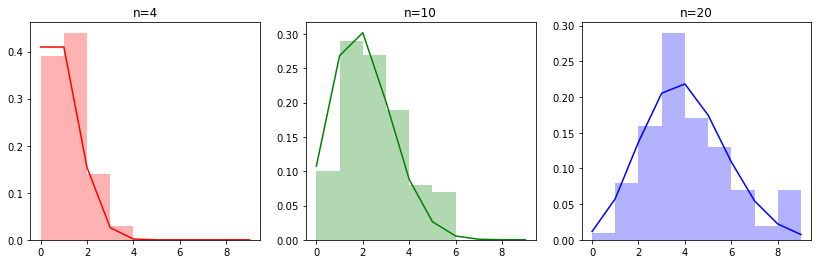

In [41]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = [4, 10, 20]
colors=['red','green','blue']

fig, ax = plt.subplots(1,3,figsize=(14,4))
for i in range(3):
    sample_bin = [stats.binom.rvs(n=1, p=0.2, size=N[i]).sum() for _ in range(100)]
    binom_density = stats.binom.pmf(n=N[i],p=0.2,k=np.arange(10))

    ax[i].hist(sample_bin, density=True, bins=np.arange(10), color=colors[i], alpha=.3);
    ax[i].plot(binom_density, color=colors[i]);
    ax[i].set_title('n='+str(N[i]))

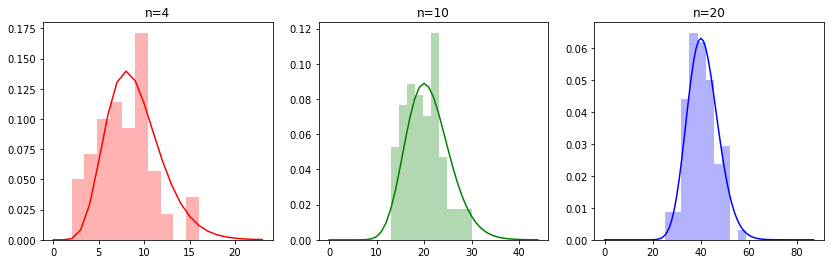

In [66]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = [4, 10, 20]
colors=['red','green','blue']

fig, ax = plt.subplots(1,3,figsize=(14,4))
for i in range(3):
    sample_bin = [stats.poisson.rvs(2, size=N[i]).sum() for _ in range(100)]
    binom_density = stats.poisson.pmf(N[i]*2, np.arange(int(max(sample_bin)*1.5)))

    ax[i].hist(sample_bin, density=True, color=colors[i], alpha=.3);
    ax[i].plot(binom_density, color=colors[i]);
    ax[i].set_title('n='+str(N[i]))

98